# Timeseries problem

#1. Importing the libraries

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

#2. Data transformation

In [65]:
df = pd.read_csv('TrainAndValid.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347518 entries, 0 to 347517
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   347518 non-null  int64  
 1   SalePrice                 347518 non-null  int64  
 2   MachineID                 347518 non-null  int64  
 3   ModelID                   347518 non-null  int64  
 4   datasource                347518 non-null  int64  
 5   auctioneerID              330302 non-null  float64
 6   YearMade                  347518 non-null  int64  
 7   MachineHoursCurrentMeter  97943 non-null   float64
 8   UsageBand                 44206 non-null   object 
 9   saledate                  347518 non-null  object 
 10  fiModelDesc               347518 non-null  object 
 11  fiBaseModel               347518 non-null  object 
 12  fiSecondaryDesc           230049 non-null  object 
 13  fiModelSeries             45211 non-null   o

##2.1 Explore dataset and important features


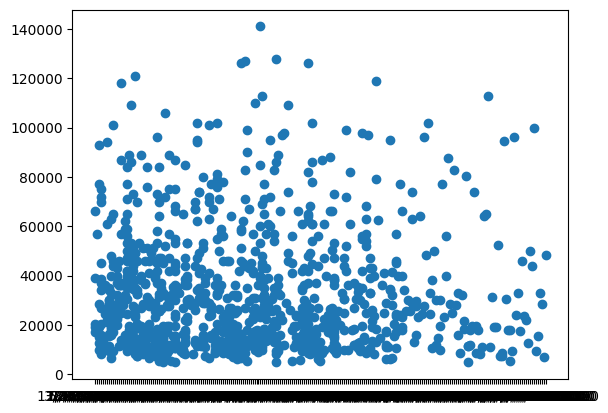

In [66]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [67]:
df.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,17216
YearMade,0
MachineHoursCurrentMeter,249575
UsageBand,303312
saledate,0


<Axes: ylabel='Frequency'>

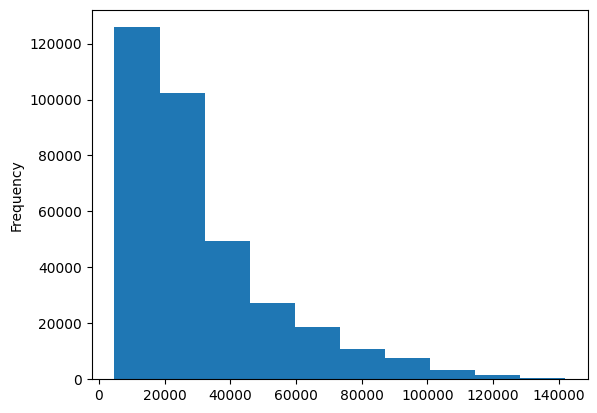

In [68]:
df.SalePrice.plot.hist()

##2.2 Parsing dates

In [69]:
df.saledate.dtype

dtype('O')

Sale date column does not have the datetime data type, so that we need to cast this column to have correct data type.

In [99]:
df = pd.read_csv('TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])

In [100]:
df.saledate.dtype

dtype('<M8[ns]')

In [101]:
df.saledate[:1000]

,saledate
0,2006-11-16
1,2004-03-26
2,2004-02-26
3,2011-05-19
4,2009-07-23
...,...
995,2009-07-16
996,2007-06-14
997,2005-09-22
998,2005-07-28


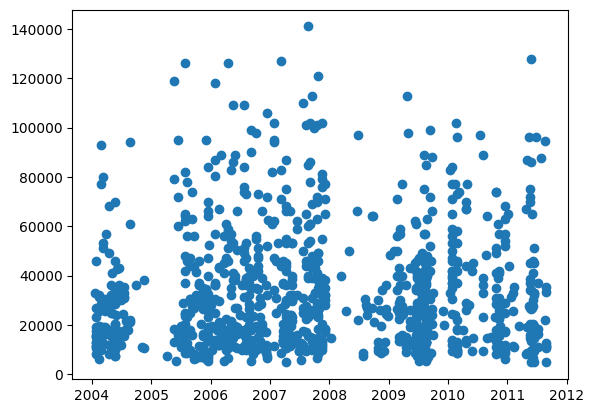

In [102]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [103]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 53 columns and we can't see the full table with existing structure in this notebook, we will then pivot the table in order to read some head data.

In [104]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


##2.3 Sort dataframe by sale date

It's a good practice for time series problem to sort dataframe by the date

In [105]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df['saledate'].head(10), df['saledate'].tail(10)

(205615   1989-01-17
 274835   1989-01-31
 141296   1989-01-31
 212552   1989-01-31
 62755    1989-01-31
 54653    1989-01-31
 81383    1989-01-31
 204924   1989-01-31
 135376   1989-01-31
 113390   1989-01-31
 Name: saledate, dtype: datetime64[ns],
 409202   2012-04-28
 408976   2012-04-28
 411695   2012-04-28
 411319   2012-04-28
 408889   2012-04-28
 410879   2012-04-28
 412476   2012-04-28
 411927   2012-04-28
 407124   2012-04-28
 409203   2012-04-28
 Name: saledate, dtype: datetime64[ns])

##2.4 Make a copy of original dataframe (in case we might mess up df)

In [106]:
df_temp = df.copy()

##2.5 Add datetime parameters for 'saledate' column

In [107]:
# enrich datetime column with all datetime features
df_temp['saleYear'] = df_temp.saledate.dt.year
df_temp['saleMonth'] = df_temp.saledate.dt.month
df_temp['saleDay'] = df_temp.saledate.dt.day
df_temp['saleDayOfWeek'] = df_temp.saledate.dt.dayofweek
df_temp['saleDayOfYear'] = df_temp.saledate.dt.dayofyear

In [108]:
# remove original datetime column
df_temp.drop('saledate', axis=1, inplace=True)

In [109]:
df_temp.saledate.head(10)

AttributeError: 'DataFrame' object has no attribute 'saledate'

In [110]:
# View newly created columns
df_temp[["SalePrice", "saleYear", "saleMonth", "saleDay", "saleDayOfWeek", "saleDayOfYear"]].head()

,SalePrice,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,9500.0,1989,1,17,1,17
274835,14000.0,1989,1,31,1,31
141296,50000.0,1989,1,31,1,31
212552,16000.0,1989,1,31,1,31
62755,22000.0,1989,1,31,1,31


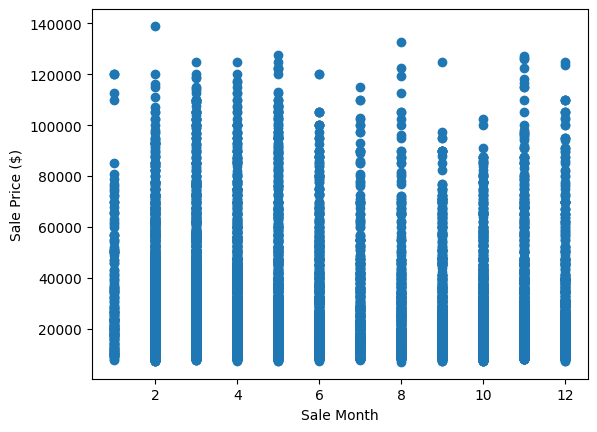

In [111]:
# View 10,000 samples SalePrice against saleMonth
fig, ax = plt.subplots()
ax.scatter(x=df_temp["saleMonth"][:10000], # visualize the first 10000 values
           y=df_temp["SalePrice"][:10000])
ax.set_xlabel("Sale Month")
ax.set_ylabel("Sale Price ($)");

#3. Modelling

Taking this map as a guideline to choose the possible models: https://scikit-learn.org/1.5/machine_learning_map.html
. Following the Scikit-Learn machine learning map and taking into account the fact we've got over 100,000 examples, we find a sklearn.linear_model.SGDRegressor() or a sklearn.ensemble.RandomForestRegressor() model might be a good candidate.

In [112]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X=df_temp.drop("SalePrice", axis=1), # use all columns except SalePrice as X input
          y=df_temp.SalePrice) # use SalePrice column as y input

ValueError: could not convert string to float: 'Low'

This won't work since since some of the features of the dataframe are in string format and machine learning model requires numerical values. We need to take extra steps to cast data types.
## 3.1 Convert string to categories



In [113]:
# Start a count of how many object type columns there are
number_of_object_type_columns = 0

for label, content in df_temp.items():
    # Check to see if column is of object type (this will include the string columns)
    if pd.api.types.is_object_dtype(content):
        # Check datatype of target column
        column_datatype = df_temp[label].dtype.name

        # Get random sample from column values
        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}")

        number_of_object_type_columns += 1

print(f"\n[INFO] Total number of object type columns: {number_of_object_type_columns}")

Column name: UsageBand | Column dtype: object | Example value: ['Low'] | Example value dtype: string
Column name: fiModelDesc | Column dtype: object | Example value: ['970F'] | Example value dtype: string
Column name: fiBaseModel | Column dtype: object | Example value: ['65'] | Example value dtype: string
Column name: fiSecondaryDesc | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiModelSeries | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiModelDescriptor | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: ProductSize | Column dtype: object | Example value: ['Medium'] | Example value dtype: string
Column name: fiProductClassDesc | Column dtype: object | Example value: ['Track Type Tractor, Dozer - 105.0 to 130.0 Horsepower'] | Example value dtype: string
Column name: state | Column dtype: object | Example value: ['Pennsylvania'] | Example value dtype: string
Column na

In [114]:
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = df_temp[label].astype("category")

In [115]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [116]:
# Check the datatype of a single column
df_temp.state.dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False, categories_dtype=object)

In [117]:
# Inspect the category codes
df_temp.state.cat.codes

,0
205615,43
274835,8
141296,8
212552,8
62755,8
...,...
410879,4
412476,4
411927,4
407124,4


We notice that there are some null values for some of columns.

In [118]:
df_temp.isna().sum().sort_values(ascending=False)

,0
Blade_Width,386715
Engine_Horsepower,386715
Tip_Control,386715
Pushblock,386715
Blade_Extension,386715
Enclosure_Type,386715
Scarifier,386704
Hydraulics_Flow,367823
Grouser_Tracks,367823
Coupler_System,367724


We can see that missing values exist in both numerical and categorical columns. Filling these missing values for each type require different procedure.
##3.2 Filling missing value
###3.2.1 Filling missing numerical values

In [119]:
# Check for which numeric columns have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")

Column name: auctioneerID | Has missing values: True
Column name: MachineHoursCurrentMeter | Has missing values: True


The easiest option is to fill missing numeric values with the median value of the target column. We'll also add a binary column (0 or 1) with rows reflecting whether or not a value was missing for later inspectation without losing necessary knowledge.

In [120]:
# Fill missing numeric values with the median of the target column
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():

            # Add a binary column which tells if the data was missing our not
            df_temp[label+"_is_missing"] = pd.isnull(content).astype(int) # this will add a 0 or 1 value to rows with missing values (e.g. 0 = not missing, 1 = missing)

            # Fill missing numeric values with median since it's more robust than the mean
            df_temp[label] = content.fillna(content.median())

In [121]:
# Show rows where MachineHoursCurrentMeter_is_missing == 1
df_temp[df_temp["MachineHoursCurrentMeter_is_missing"] == 1].sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
167041,1592786,19000.0,1312996,4696,132,14.0,1975,0.0,NaN,544B,...,NaN,Standard,Conventional,1994,3,19,5,78,0,1
411320,6306485,92500.0,1893041,23618,149,1.0,2007,0.0,NaN,WA320-5L,...,NaN,Standard,Conventional,2012,3,14,2,74,0,1
131108,1484245,36000.0,1362418,3876,132,1.0,1973,0.0,NaN,980B,...,NaN,Standard,Conventional,1989,11,14,1,318,0,1
181621,1615062,10500.0,1111152,4601,132,18.0,1983,0.0,NaN,310B,...,NaN,NaN,NaN,1996,5,1,2,122,0,1
252489,1768452,80000.0,438021,495,132,4.0,1997,0.0,NaN,PC400LC6,...,NaN,NaN,NaN,2003,2,10,0,41,0,1


In [122]:
# Check again for which numeric columns have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")

###3.2.2 Filling in categorical data

In [123]:
# Check for which categorical columns have null values
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")

Column name: UsageBand | Has missing values: True
Column name: fiSecondaryDesc | Has missing values: True
Column name: fiModelSeries | Has missing values: True
Column name: fiModelDescriptor | Has missing values: True
Column name: ProductSize | Has missing values: True
Column name: Drive_System | Has missing values: True
Column name: Enclosure | Has missing values: True
Column name: Forks | Has missing values: True
Column name: Pad_Type | Has missing values: True
Column name: Ride_Control | Has missing values: True
Column name: Stick | Has missing values: True
Column name: Transmission | Has missing values: True
Column name: Turbocharged | Has missing values: True
Column name: Blade_Extension | Has missing values: True
Column name: Blade_Width | Has missing values: True
Column name: Enclosure_Type | Has missing values: True
Column name: Engine_Horsepower | Has missing values: True
Column name: Hydraulics | Has missing values: True
Column name: Pushblock | Has missing values: True
Colum

In [124]:
# 1. Create a dictionary to store column to category values (e.g. we turn our category types into numbers but we keep a record so we can go back)
column_to_category_dict = {}

# 2. Turn categorical variables into numbers
for label, content in df_temp.items():

    # 3. Check categorical columns
    if not pd.api.types.is_numeric_dtype(content):

        # 4. Add binary column to inidicate whether sample had missing value
        df_temp[label+"_is_missing"] = pd.isnull(content).astype(int)

        # 5. Ensure content is categorical and get its category codes
        content_categories = pd.Categorical(content)
        content_category_codes = content_categories.codes + 1 # prevents -1 (the default for NaN values) from being used for missing values (we'll treat missing values as 0)

        # 6. Add column key to dictionary with code: category mapping per column
        column_to_category_dict[label] = dict(zip(content_category_codes, content_categories))

        # 7. Set the column to the numerical values (the category code value)
        df_temp[label] = content_category_codes

In [125]:
# Check the UsageBand (measure of bulldozer usage)
for key, value in sorted(column_to_category_dict["UsageBand"].items()): # note: calling sorted() on dictionary.items() sorts the dictionary by keys
    print(f"{key} -> {value}")

0 -> nan
1 -> High
2 -> Low
3 -> Medium


##3.3 Save our processed data

In [103]:
# Save preprocessed data with object values as categories as well as missing values filled
df_temp.to_parquet(path="...",
                  engine="auto")

IsADirectoryError: [Errno 21] Failed to open local file '/content/'. Detail: [errno 21] Is a directory

# 4. Train the model

In [130]:
# Split data into training and validation
df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [138]:
# Instantiate model
model = RandomForestRegressor(n_jobs=-1, random_state=42) # note: this could take quite a while depending on your machine (it took ~1.5 minutes on my MacBook Pro M1 Pro with 10 cores)

# This will take forever to train the data, don't do this
# Create features and labels with entire dataset
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

Training the model like this is costly. Breaking down the dataset into a smaller subset to train the model is a more sustainable choice.

In [139]:
# Change max samples in RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000)

model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1)

#5 Evaluate the model
Since Scikit-Learn doesn't have a function built-in for RMSLE, we'll create our own.

In [140]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

# TK - can now use RMSLE from sckit-learn, see: https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.root_mean_squared_log_error.html#sklearn.metrics.root_mean_squared_log_error
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [141]:
show_scores(model)

{'Training MAE': 5569.873919426612,
 'Valid MAE': 7170.233447679944,
 'Training RMSLE': 0.2577687594601486,
 'Valid RMSLE': 0.29346014432906725,
 'Training R^2': 0.8600945379536025,
 'Valid R^2': 0.8328415192844477}

## 5.1 Tune the hyperparameters
Testing on a sample of the training set and tune the hyperparameters on that before training a larger model is the way to go.


In [142]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1.0, "sqrt"], # Note: "max_features='auto'" is equivalent to "max_features=1.0", as of Scikit-Learn version 1.1
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 8min 23s, sys: 9.71 s, total: 8min 33s
Wall time: 8min 54s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1.0, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [143]:
# Find the best parameters from the RandomizedSearch
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 1.0,
 'max_depth': None}

In [145]:
show_scores(rs_model)

{'Training MAE': 5757.154000189707,
 'Valid MAE': 7292.493845815333,
 'Training RMSLE': 0.26444923949978344,
 'Valid RMSLE': 0.2952732100587554,
 'Training R^2': 0.8485482605624705,
 'Valid R^2': 0.8221860451021474}

#6 Retrain the model with best params
These params were gathered from n_iter=100

In [146]:
# most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [147]:
# scores for ideal model (trained on all data)
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.2452416398953833,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

In [148]:
# scores on rs_model (trained on 10,000 examples)
show_scores(rs_model)

{'Training MAE': 5757.154000189707,
 'Valid MAE': 7292.493845815333,
 'Training RMSLE': 0.26444923949978344,
 'Valid RMSLE': 0.2952732100587554,
 'Training R^2': 0.8485482605624705,
 'Valid R^2': 0.8221860451021474}

#7 Predictions on test set

In [167]:
df_test = pd.read_csv('Test.csv', low_memory=False, parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [151]:
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


In [152]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

This means that we need repeat pre-processing data moves before jumping into making predictions.

In [168]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)

    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())

        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1

    return df


In [169]:
preprocess_data(df_test)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [166]:
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [170]:
# find missmatched columns
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [171]:
# add missing column with correct value
df_test['auctioneerID_is_missing'] = False
# arrange the columns matching the training columns order
df_test = df_test[X_train.columns]

In [177]:
test_preds = ideal_model.predict(df_test)

AttributeError: 'numpy.ndarray' object has no attribute 'show'

In [178]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalePrice'] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
...,...,...
12452,6643171,39966.363007
12453,6643173,12049.704433
12454,6643184,11964.850733
12455,6643186,16496.710793
